In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('../../data/precision_recall_f1_clusterable.csv')

In [14]:
df.head(20)

,category,threshold_perc,precision,recall,f1
0,pizza,60,0.994112,0.930478,0.961243
1,pizza,70,0.994859,0.889789,0.939395
2,pizza,80,0.996976,0.837471,0.910289
3,pizza,90,0.998139,0.790325,0.882158
4,pizza,95,0.998648,0.730839,0.844009
5,line,60,0.985308,0.988292,0.986798
6,line,70,0.989244,0.965384,0.977169
7,line,80,0.989244,0.965384,0.977169
8,line,90,0.989244,0.965384,0.977169
9,line,95,0.989330,0.944563,0.966428


<Figure size 1000x500 with 0 Axes>

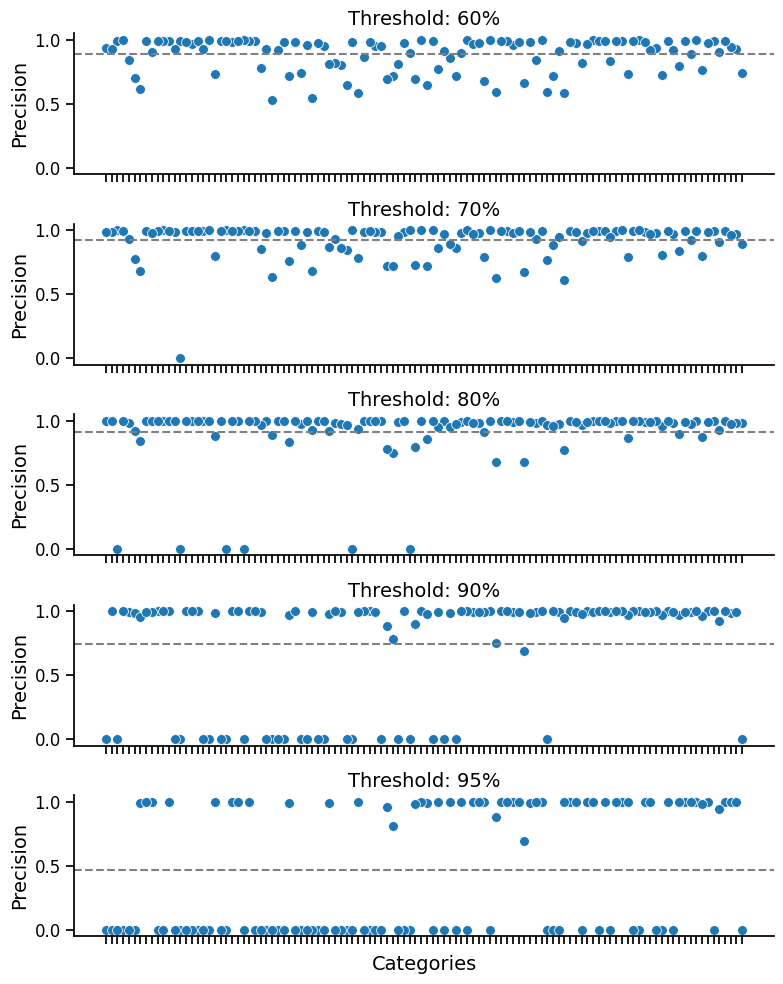

In [ ]:
# Ensure 'category' is treated as an ordered categorical variable
df["category"] = pd.Categorical(df["category"], categories=sorted(df["category"].unique()), ordered=True)

# Sort df by threshold_perc to ensure correct order
df = df.sort_values("threshold_perc")

# define figure size
plt.figure(figsize=(10, 5))

# Increase all font sizes
sns.set_context("notebook", rc={
    "axes.titlesize": 16,      # subplot titles
    "axes.labelsize": 14,      # x and y axis labels
    "xtick.labelsize": 12,     # x-axis tick labels
    "ytick.labelsize": 12,     # y-axis tick labels
    "legend.fontsize": 12      # legend text
})

# Create FacetGrid with 5 rows, one per threshold value
g = sns.FacetGrid(df, col="threshold_perc", col_wrap=1, sharey=True, height=2, aspect=4)  

# Map scatterplot (only points) to each subplot
g.map_dataframe(sns.scatterplot, x="category", y="precision", s=50)  # s controls point size

# Add horizontal dashed line for average precision in each subplot
def add_avg_line(data, color, **kwargs):
    avg = data["precision"].mean()
    plt.axhline(avg, color="gray", linestyle="--")

g.map_dataframe(add_avg_line)

# Set subplot titles
g.set_titles(col_template="Threshold: {col_name}%")

# Rotate x-axis labels for readability
g.set_xticklabels(rotation=45, ha="right")

# Set axis labels
g.set_axis_labels("Categories", "Precision")

plt.tight_layout()

plt.savefig("../../plots_downstream/precision_vs_category_all_thresholds.pdf")
